In [22]:
import nibabel as nib
import scipy.linalg as la
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [29]:
import seaborn as sns

In [2]:
import nilearn.plotting

In [5]:
!ls /home/vassiki/budapest_data/outputs/datapaper/tsnr/

figures        sub-sid000020  sub-sid000034  sub-sid000134  sub-sid000535
sub-sid000005  sub-sid000021  sub-sid000050  sub-sid000142  sub-sid000560
sub-sid000007  sub-sid000024  sub-sid000052  sub-sid000278
sub-sid000009  sub-sid000025  sub-sid000055  sub-sid000416
sub-sid000010  sub-sid000029  sub-sid000114  sub-sid000499
sub-sid000013  sub-sid000030  sub-sid000120  sub-sid000522


In [11]:
subjects = [path.split('/')[-1] for path in glob('/home/vassiki/budapest_data/outputs/datapaper/tsnr/sub-*')]
subjects = sorted(subjects)

In [6]:
tsnr_fns = sorted(glob(f'/home/vassiki/budapest_data/outputs/datapaper/tsnr/sub-*/*median*.nii.gz'))

In [26]:
def make_conjuction_mask(subject):
    mask_fns = glob(f'/home/vassiki/budapest_data/outputs/fmriprep/{subject}/func/*space-T1w_desc-brain_mask.nii.gz')
    brainmask = 1.
    for mask_fn in mask_fns:
        bm = nib.load(mask_fn).get_fdata()
        brainmask *= bm
    return brainmask.astype(bool)

In [30]:
tsnr_template_filename = '/home/vassiki/budapest_data/outputs/datapaper/tsnr/{subject}/{subject}_task-movie_run-median_space-T1w_desc-tsnr.nii.gz'
tsnr_subject = []
for subject in subjects:
    tsnr = nib.load(tsnr_template_filename.format(subject=subject)).get_fdata()
    mask_subject = make_conjuction_mask(subject)
    tsnr_subject.append(tsnr[mask_subject])

In [31]:
# sort subjects according to median tsnr
subject_ordering = np.argsort([np.median(t) for t in tsnr_subject])

In [36]:
OUTDIR = '/home/vassiki/budapest_data/outputs/datapaper/tsnr/figures'

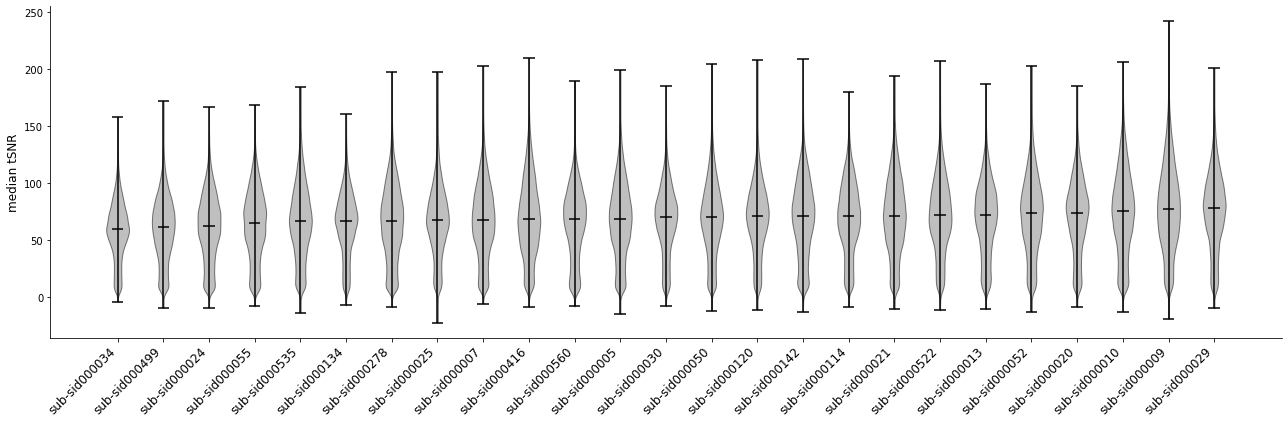

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
pos = np.arange(len(subject_ordering))
tsnr_subject_ordered = [tsnr_subject[i] for i in subject_ordering]
parts = ax.violinplot(tsnr_subject_ordered, positions=pos, showmedians=True);
for pc in parts['bodies']:
    pc.set_facecolor('gray')
    pc.set_edgecolor('black')
    pc.set_alpha(0.5)

for p in ['cbars', 'cmins', 'cmaxes', 'cmedians']:
    parts[p].set_edgecolor('black')

ax.set_xticks(pos)
ax.set_xticklabels([subjects[i] for i in subject_ordering], fontsize=12, rotation=45, ha='right')
ax.set_ylabel('median tSNR', fontsize=12)
sns.despine()
plt.tight_layout()
fig.savefig(f"{OUTDIR}/group_median-tsnr.png", dpi=300, bbox_inches='tight')